In [68]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn. linear_model import LogisticRegression
import pickle
import warnings

warnings.filterwarnings('ignore')

In [69]:
from google.colab import files
uploads=files.upload()

Saving kidney_disease.csv to kidney_disease (1).csv


In [70]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [71]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [73]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinite','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinite', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinite         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [75]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinite            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinite         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [77]:
data.head(2)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [78]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'pedal_edema', 'red_blood_cells', 'anemia', 'pus_cell_clumps', 'white_blood_cell_count', 'pus_cell', 'hypertension', 'coronary_artery_disease', 'red_blood_cell_count', 'appetite', 'packed_cell_volume', 'diabetesmellitus', 'class', 'bacteria'}


In [79]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
************************************************************************************************************************

Columns: red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
************************************************************************************************************************

Columns: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

Columns: pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
************************************************************************************************************************

Columns: white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7500': 5,

In [80]:
catcols

{'anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'packed_cell_volume',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'white_blood_cell_count'}

In [81]:
catcols.remove('packed_cell_volume')
catcols.remove('red_blood_cell_count')
catcols.remove('white_blood_cell_count')
print(catcols)

{'pedal_edema', 'red_blood_cells', 'anemia', 'pus_cell_clumps', 'pus_cell', 'hypertension', 'coronary_artery_disease', 'appetite', 'diabetesmellitus', 'class', 'bacteria'}


In [82]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i] = LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

LABEL ENCODING OF: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
Counter({0: 323, 1: 76, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
Counter({1: 201, 2: 152, 0: 47})
****************************************************************************************************
LABEL ENCODING OF: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
Counter({0: 339, 1: 60, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
Counter({0: 354, 1: 42, 2: 4})
****************************************************************************************************
LABEL ENCODING OF: pus_cell
Counter({'normal': 259, 'abnormal': 76, nan: 65})
Counter({1: 259, 0: 76, 2: 65})
**************************************************

In [83]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'sugar', 'serum_creatinite', 'id', 'pus_cell', 'appetite', 'pedal_edema', 'anemia', 'age', 'blood_urea', 'coronary_artery_disease', 'red_blood_cells', 'pus_cell_clumps', 'blood_pressure', 'hypertension', 'class', 'hemoglobin', 'albumin', 'sodium', 'blood glucose random', 'diabetesmellitus', 'potassium', 'bacteria', 'specific_gravity'}


In [84]:
for i in contcols:
    print("Continous Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns : sugar
Counter({0.0: 290, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

Continous Columns : serum_creatinite
Counter({1.2: 40, 1.1: 24, 1.0: 23, 0.5: 23, 0.7: 22, 0.9: 22, 0.6: 18, 0.8: 17, 2.2: 10, 1.5: 9, 1.7: 9, 1.3: 8, 1.6: 8, 1.8: 7, 1.4: 7, 2.5: 7, 2.8: 7, 1.9: 6, 2.7: 5, 2.1: 5, 2.0: 5, 3.2: 5, 3.3: 5, 3.9: 4, 7.3: 4, 4.0: 3, 2.4: 3, 3.4: 3, 2.9: 3, 5.3: 3, 2.3: 3, 7.2: 2, 4.6: 2, 4.1: 2, 5.2: 2, 6.3: 2, 3.0: 2, 6.1: 2, 6.7: 2, 5.6: 2, 6.5: 2, 4.4: 2, 6.0: 

In [85]:
contcols

{'age',
 'albumin',
 'anemia',
 'appetite',
 'bacteria',
 'blood glucose random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'id',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'serum_creatinite',
 'sodium',
 'specific_gravity',
 'sugar'}

In [86]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'sugar', 'serum_creatinite', 'id', 'pus_cell', 'appetite', 'pedal_edema', 'anemia', 'white_blood_cell_count', 'age', 'blood_urea', 'coronary_artery_disease', 'red_blood_cell_count', 'packed_cell_volume', 'red_blood_cells', 'pus_cell_clumps', 'blood_pressure', 'hypertension', 'class', 'hemoglobin', 'albumin', 'sodium', 'blood glucose random', 'diabetesmellitus', 'potassium', 'bacteria', 'specific_gravity'}


In [87]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'serum_creatinite', 'id', 'pus_cell', 'appetite', 'pedal_edema', 'anemia', 'white_blood_cell_count', 'age', 'blood_urea', 'coronary_artery_disease', 'red_blood_cell_count', 'packed_cell_volume', 'red_blood_cells', 'pus_cell_clumps', 'blood_pressure', 'hypertension', 'class', 'hemoglobin', 'sodium', 'blood glucose random', 'diabetesmellitus', 'potassium', 'bacteria'}


In [88]:
catcols

{'anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells'}

In [89]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'pedal_edema', 'red_blood_cells', 'anemia', 'pus_cell_clumps', 'sugar', 'pus_cell', 'hypertension', 'coronary_artery_disease', 'appetite', 'diabetesmellitus', 'albumin', 'class', 'bacteria', 'specific_gravity'}


In [90]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 362, 2: 34, 0: 2, 3: 2})

In [91]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes'})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 258, 2: 1, 0: 3, 1: 2, 5: 2})

In [92]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mode(),inplace=True)
data['serum_creatinite'].fillna(data['serum_creatinite'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mode(),inplace=True)

data['age'].fillna(data['age'].median(),inplace=True)
data['hypertension'].fillna(data['hypertension'].mode(),inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode(),inplace=True)
data['appetite'].fillna(data['appetite'].mode(),inplace=True)
data['albumin'].fillna(data['albumin'].median(),inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode(),inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode(),inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode(),inplace=True)
data['bacteria'].fillna(data['bacteria'].mode(),inplace=True)
data['anemia'].fillna(data['anemia'].mode(),inplace=True)
data['sugar'].fillna(data['sugar'].median(),inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode(),inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode(),inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].median(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mode(),inplace=True)


data['packed_cell_volume'] = data['packed_cell_volume'].replace(np.nan, 0)
data['red_blood_cell_count'] = data['red_blood_cell_count'].replace(np.nan, 0)
data['white_blood_cell_count'] = data['white_blood_cell_count'].replace(np.nan, 0)

In [93]:
data.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinite           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          400 non-null    int64  
 7   pus_cell                 400 non-null    int64  
 8   pus_cell_clumps          400 non-null    int64  
 9   bacteria                 400 non-null    int64  
 10  blood glucose random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinite         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [95]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,sodium,potassium,hemoglobin,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,199.500000,51.562500,76.469072,1.017712,0.90000,0.395000,1.262500,0.972500,0.125000,0.075000,...,137.528754,4.627244,12.526437,0.377500,3.310000,1.090000,0.210000,0.195000,0.15500,0.755000
std,115.614301,16.982996,13.476298,0.005434,1.31313,1.040038,0.655491,0.593823,0.360138,0.299331,...,9.204273,2.819783,2.716171,0.495588,0.591417,0.319618,0.413918,0.402965,0.36921,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,2.000000,2.000000,2.000000,2.000000,...,163.000000,47.000000,17.800000,2.000000,5.000000,3.000000,2.000000,2.000000,2.00000,2.000000


<Axes: xlabel='age', ylabel='Density'>

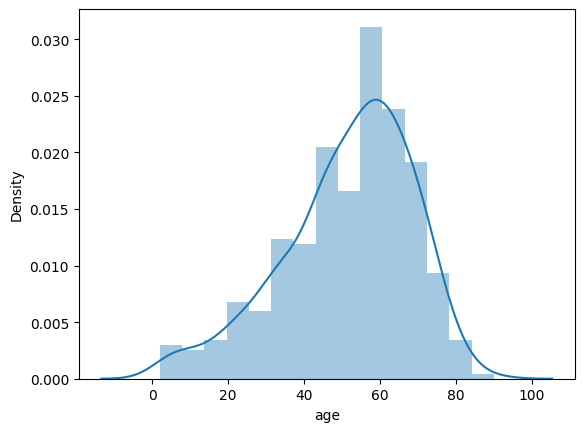

In [96]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood Scatter Plot ')

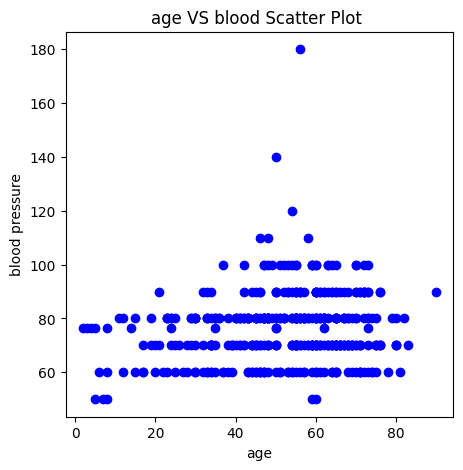

In [97]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title("age VS blood Scatter Plot ")

In [98]:
contcols

{'age',
 'anemia',
 'appetite',
 'bacteria',
 'blood glucose random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'id',
 'packed_cell_volume',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'serum_creatinite',
 'sodium',
 'white_blood_cell_count'}

In [99]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

<Figure size 2000x1500 with 0 Axes>

In [100]:
columnList=['age','sodium','potassium','hemoglobin','serum_creatinite','blood glucose random','blood_pressure','blood glucose random','blood_urea','hypertension','hemoglobin']


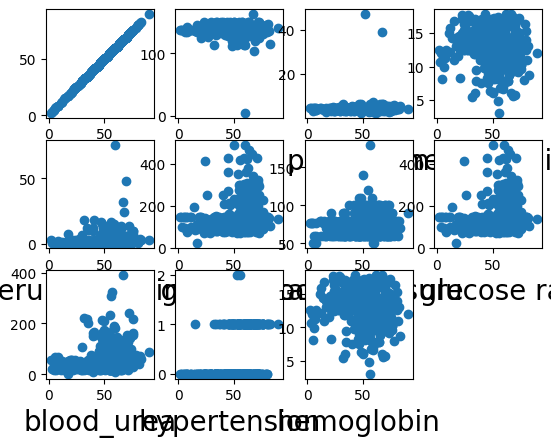

In [101]:
for column in columnList:
    if plotnumber<=11 :
       ax = plt.subplot(3,4,plotnumber)
       plt.scatter(data['age'],data[column])
       plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()    



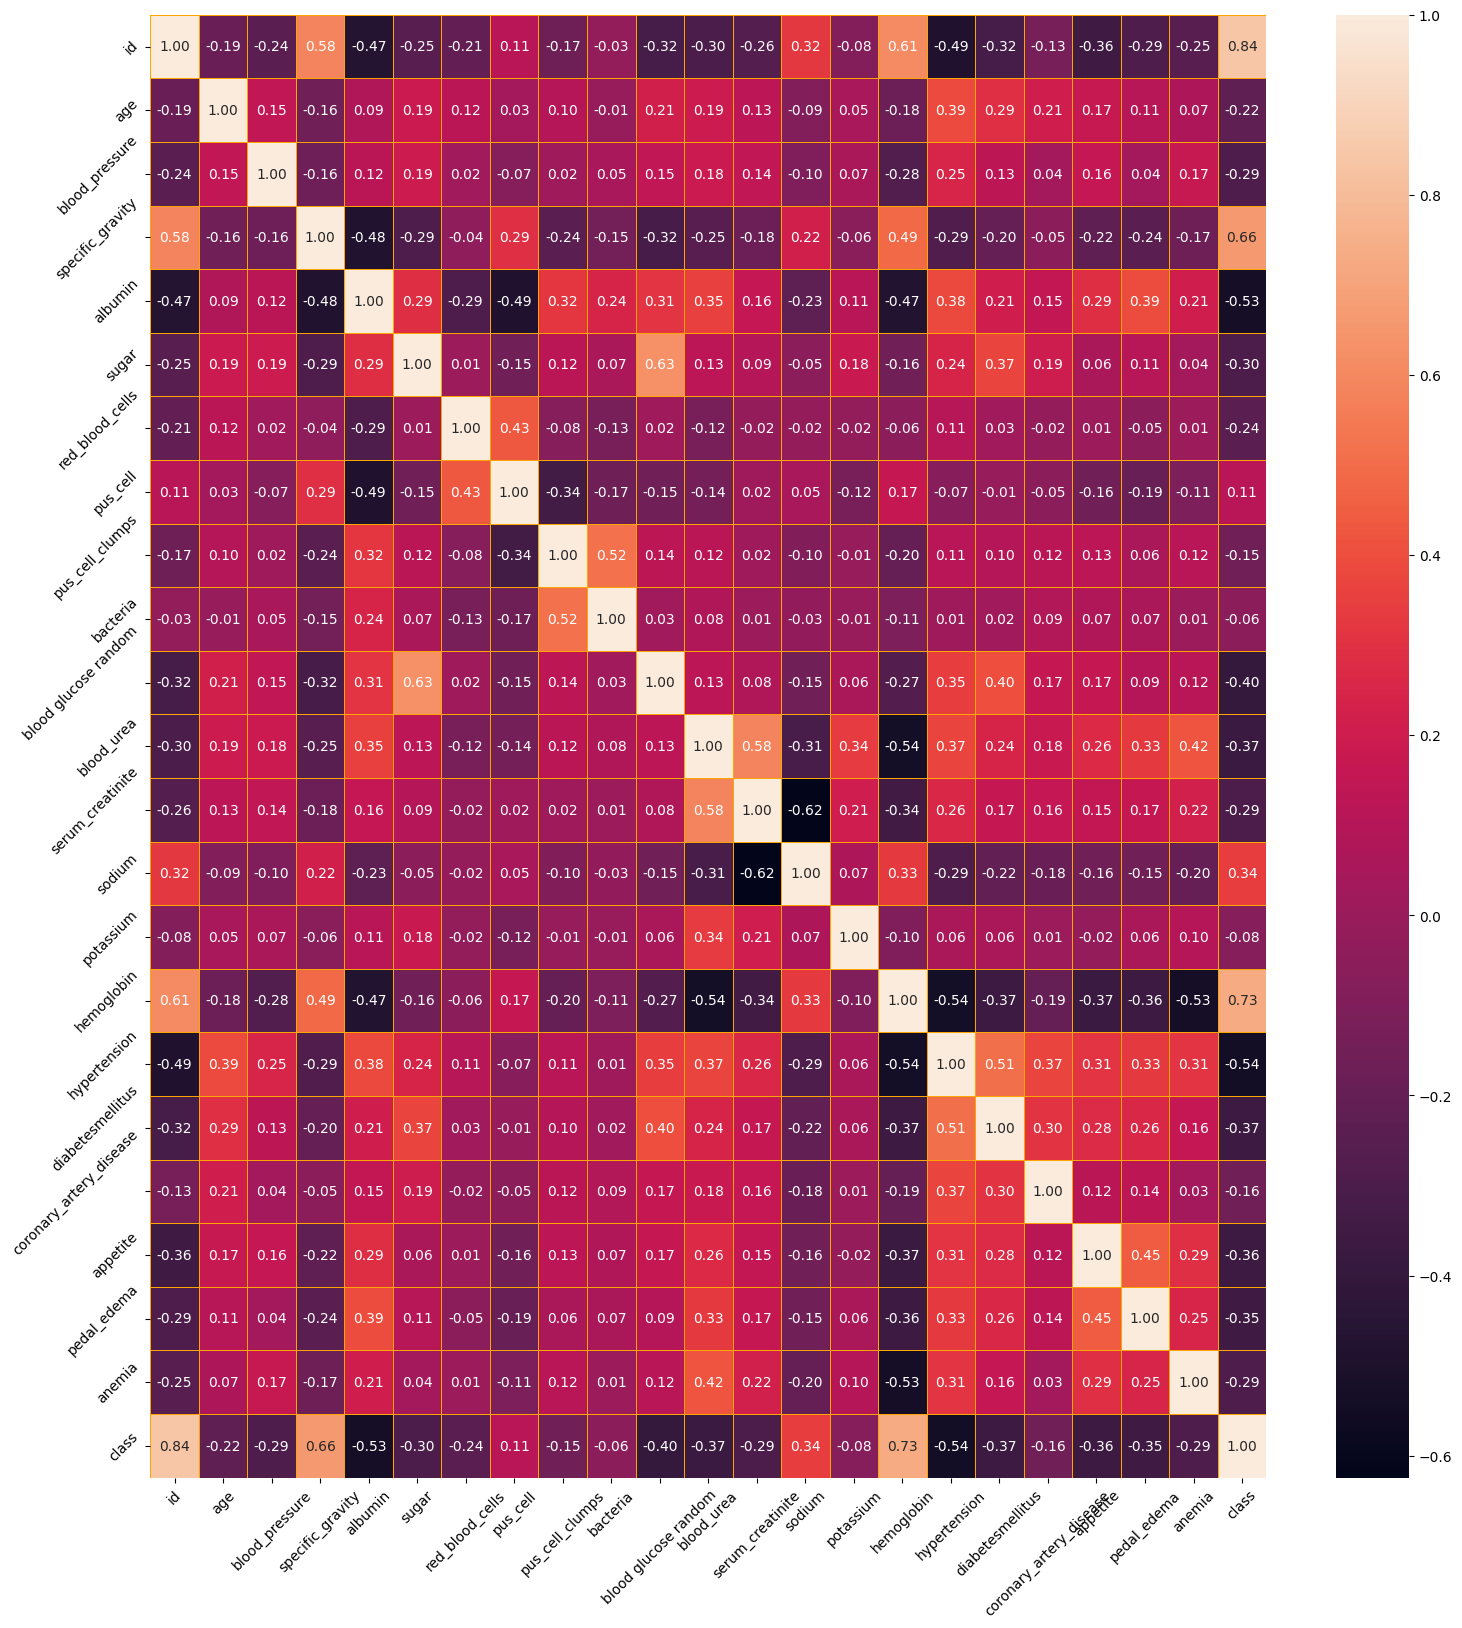

In [102]:
f,ax=plt.subplots(figsize=(18,19))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: xlabel='class', ylabel='count'>

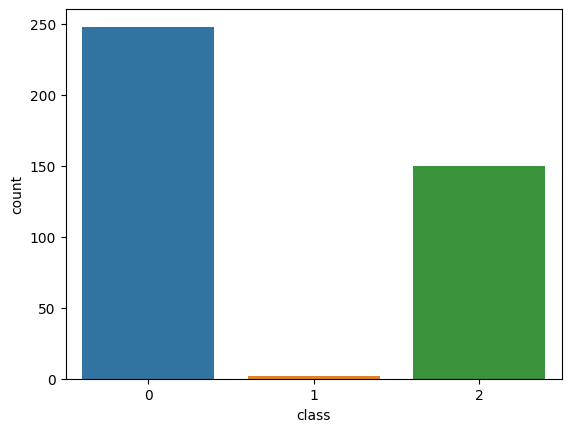

In [103]:
sns.countplot(x=data['class'])


In [104]:
setcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=setcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xscaled=sc.fit_transform(x)

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [107]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [108]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [109]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 2.3713 - accuracy: 0.2734 - val_loss: 0.9488 - val_accuracy: 0.2031
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.2891 - val_loss: 0.5643 - val_accuracy: 0.1562
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7232 - accuracy: 0.2617 - val_loss: 1.2529 - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.2852 - val_loss: 0.5990 - val_accuracy: 0.1875
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.2539 - val_loss: 0.7823 - val_accuracy: 0.1719
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.7689 - accuracy: 0.3281 - val_loss: 0.4758 - val_accuracy: 0.2812
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.2188 - val_loss: 0.4315 - val_accuracy: 0.4219
Epoch 8/100


In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion='entropy')

In [112]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [113]:
y_predict_ = rfc.predict(x_train)

In [114]:
y_predict_train = rfc.predict(x_train)

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4, splitter='best',criterion='entropy')

In [117]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [119]:
x_test

,red_blood_cells,pus_cell,blood glucose random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
94,2,1,93.000000,66.0,0,0,4,1
32,2,1,159.000000,39.0,0,0,4,1
225,0,1,490.000000,95.0,0,0,4,1
157,1,0,122.000000,42.0,0,0,4,1
356,1,1,87.000000,38.0,0,0,3,1
...,...,...,...,...,...,...,...,...
188,2,2,80.000000,66.0,0,0,0,1
223,2,1,303.000000,30.0,0,0,4,1
65,2,1,148.036517,20.0,0,0,0,1
262,1,1,118.000000,18.0,0,0,3,1


In [120]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2])

In [121]:
y_predict_train = dtc.predict(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

In [123]:
from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)

In [124]:
y_pred = lgr.predict([[2,1,93.000000,66.0,0,0,4,1]])
print(y_pred)
(y_pred)

[0]


array([0])

In [126]:

y_pred = dtc.predict([[2,1,93.000000,66.0,0,0,4,1]])
print(y_pred)
(y_pred)

[0]


array([0])

In [127]:
y_pred = rfc.predict([[2,1,93.000000,66.0,0,0,4,1]])
print(y_pred)
(y_pred)

[0]


array([0])

In [128]:
classification.save("ckd.h5")

In [129]:
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [130]:
y_pred

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

In [132]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [133]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [134]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('Prediction: Hign chance of CKD!')
else:
    print('Prediction: Low chance of CKD')

1/1 [==============================] - 0s 99ms/step
Prediction: Hign chance of CKD!


In [135]:
from sklearn import model_selection

In [136]:
dfs = []
models = [('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('DecisionTree',DecisionTreeClassifier())]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train,y_train, cv=kfold,scoring=scoring)
    clf = model.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test,y_pred))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)





LogReg
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.00      0.00      0.00         1
           2       0.86      0.92      0.89        26

    accuracy                           0.91        80
   macro avg       0.60      0.62      0.61        80
weighted avg       0.90      0.91      0.91        80

RF
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.00      0.00      0.00         1
           2       1.00      0.96      0.98        26

    accuracy                           0.97        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.96      0.97      0.97        80

DecisionTree
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.00      0.00      0.00         1
           2       0.92      0.88      0.90        2

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

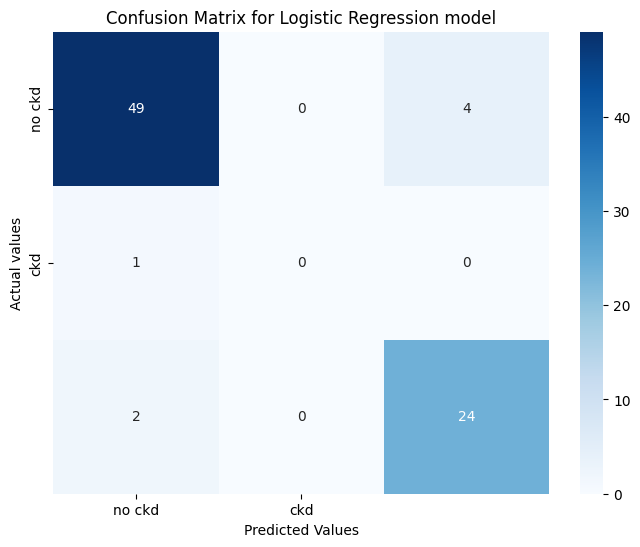

In [138]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True,xticklabels=['no ckd','ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 2,  0, 24]])

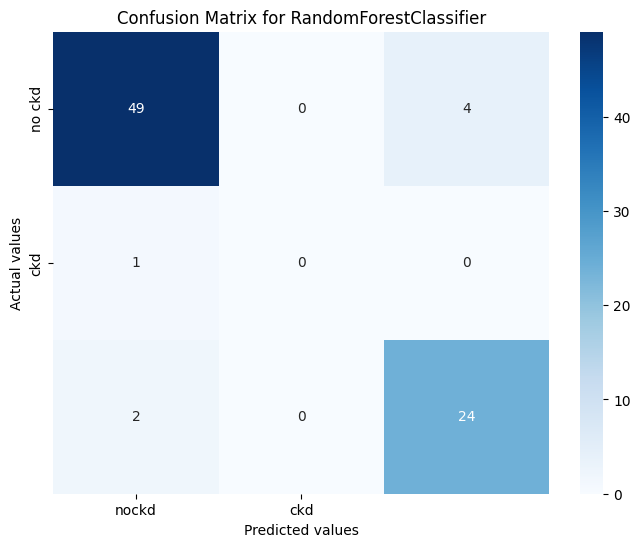

In [140]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues',annot=True, xticklabels=['nockd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 2,  0, 24]])

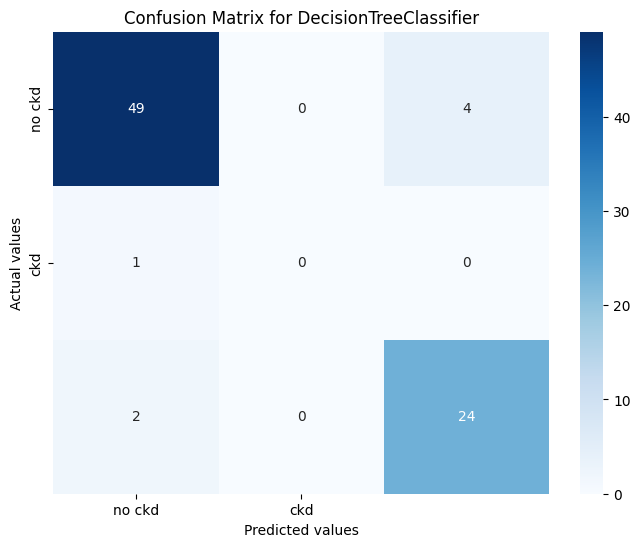

In [142]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.00      0.00      0.00         1
           2       0.92      0.88      0.90        26

    accuracy                           0.91        80
   macro avg       0.62      0.61      0.61        80
weighted avg       0.91      0.91      0.91        80



In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[50,  1,  2],
       [ 1,  0,  0],
       [ 3,  0, 23]])

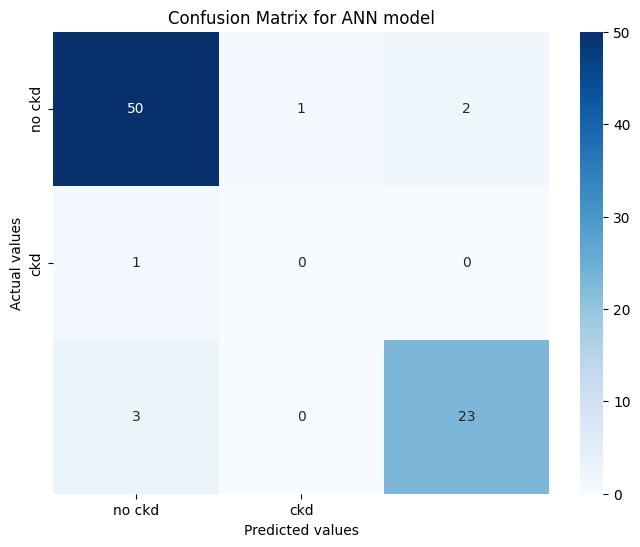

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'],yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [146]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics=['fit_time','score_time']
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')

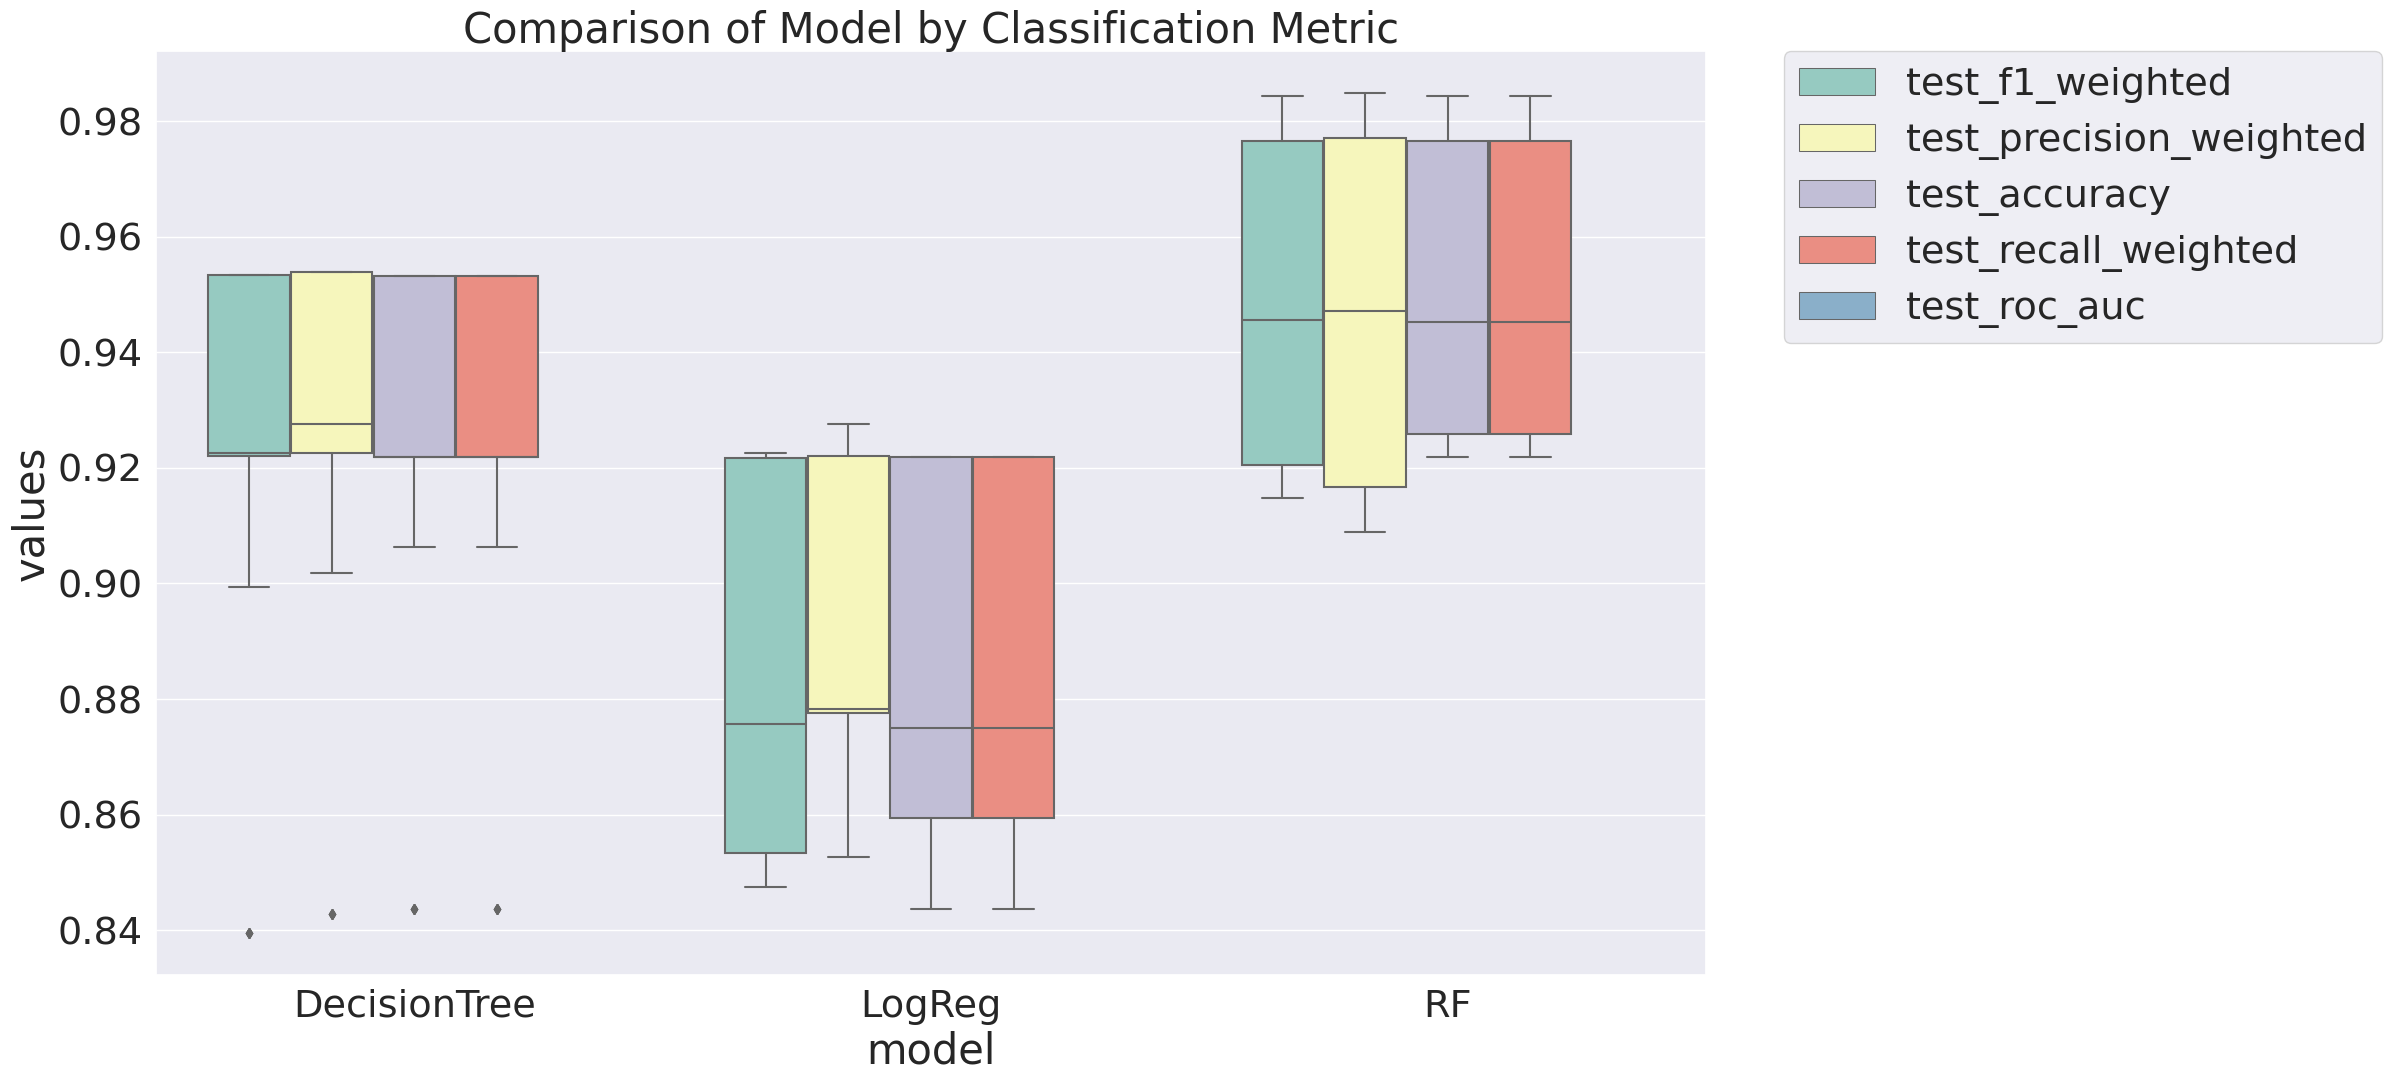

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [148]:
import pickle
pickle.dump(model,open('CKD.pkl','wb'))